<a href="https://colab.research.google.com/github/ghscharf/Python/blob/master/Final_Capstone_COVID_Pregnancy_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Data Background & Acquisition

The data used in this analysis consists of two separate patient-level datasets extracted from Epic EMR. The raw data was anonymized with all PHI removed. The final dataset is very large, containing over 123,000 records after merging. The data was extracted in August 2020 for the period of March to July 2020, and covers all H+H facilities that offer COVID testing, including the popup sites and mobile vans.

#Research Questions

###For total patient population with +COVID regardless of OB status:

1) What is the breakdown by race & ethnicity?

2) What is the breakdown by age and gender?

3) What is the breakdown by zip code?

4) What is the breakdown by primary payer (insurance)?

5) What is the breakdown by patient status (living vs. deceased) and OB status (pregnant vs. non-pregnant)?

###Compare pregnant vs. non-pregnant population in regard to: 

1) COVID infection

2) Admission if +COVID

3) On ventilator if +COVID

4) Length of stay (LOS)

#Data Wrangling

In [2]:
#import necessary packages and datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
#import datasets
non_preg_df = pd.read_csv('https://raw.githubusercontent.com/ghscharf/Python/master/COVID%20Test-Non-Preg-clean2.csv')

In [4]:
preg_df = pd.read_csv('https://raw.githubusercontent.com/ghscharf/Python/master/COVID%20Test_Pregnant_clean2.csv')

## 1) Basic Insights

In [5]:
non_preg_df.shape

(122114, 20)

In [6]:
non_preg_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON
0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,,NaN,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,3/8/2020,NaN,NaN,COVID-19 (rule out),NaN
1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,05/13/2020 2026,5/15/2020,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,3/10/2020,NaN,See report\nNormal,NaN,NaN
2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,05/16/2020 0912,5/21/2020,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,3/10/2020,NaN,Not Detected,COVID-19 (rule out),NaN
3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,05/24/2020 1324,6/8/2020,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,3/10/2020,NaN,Not Detected,NaN,NaN
4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,,NaN,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,3/10/2020,NaN,Not Detected,NaN,Yes


In [7]:
non_preg_df.columns

Index(['ID', 'RevenueLocation', 'EncounterDepartment', 'AdmitDate/Time',
       'DischargeDate', 'Service', 'Sex', 'OBStatus', 'Age', 'PatientStatus',
       'Race', 'Ethnicity', 'ZIPCode', 'PrimaryPayer', 'GA', 'ResultDate',
       'Abnormal?', 'Value', 'Infection', 'VentON'],
      dtype='object')

In [8]:
preg_df.shape

(1149, 19)

In [9]:
preg_df.columns

Index(['ID', 'RevenueLocation', 'EncounterDepartment', 'AdmitDate/Time',
       'DischargeDate', 'Service', 'Sex', 'OBStatus', 'Age', 'Race',
       'Ethnicity', 'ZIPCode', 'PrimaryPayer', 'GA', 'ResultDate', 'Abnormal?',
       'Value', 'Infection', 'VentON'],
      dtype='object')

In [10]:
preg_df.describe()

,ID,Age,ZIPCode,VentON
count,1149.000000,1149.000000,1149.000000,0.0
mean,575.000000,31.028721,10967.013925,NaN
std,331.832036,7.195990,2079.324756,NaN
min,1.000000,11.000000,6515.000000,NaN
25%,288.000000,26.000000,10458.000000,NaN
50%,575.000000,31.000000,11206.000000,NaN
75%,862.000000,36.000000,11368.000000,NaN
max,1149.000000,64.000000,71203.000000,NaN


In [11]:
non_preg_df.describe()

,ID,Age
count,122114.000000,122114.000000
mean,61057.500000,47.239514
std,35251.419723,17.603165
min,1.000000,11.000000
25%,30529.250000,33.000000
50%,61057.500000,47.000000
75%,91585.750000,60.000000
max,122114.000000,120.000000


## 2) Data tidying

In [12]:
#insert patient status column into preg df
preg_df.insert(9, 'PatientStatus','Living')

In [13]:
preg_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON
0,1,METROPOLITAN HOSPITAL CENTER,ME EXPRESSCARE,,3/8/2020,Emergency,Female,Pregnant,23,Living,White,Non-Hispanic,10029,Not on file,NaN,3/11/2020,NaN,Not Detected,NaN,NaN
1,2,LINCOLN MEDICAL CENTER,LI ED ADULT,03/10/2020 1836,3/11/2020,Emergency,Female,Pregnant,34,Living,Declined,Unknown,10468,Not on file,21w2d,3/14/2020,Abnormal,Detected,NaN,NaN
2,3,ELMHURST HOSPITAL CENTER,EL ED ADULT,03/12/2020 0254,3/13/2020,Emergency,Female,Pregnant,19,Living,Other,Mexican/Mexican American,11372,Not on file,28w3d,3/16/2020,NaN,Not Detected,NaN,NaN
3,4,ELMHURST HOSPITAL CENTER,EL ED ADULT,,3/16/2020,Emergency,Female,Pregnant,22,Living,Other,NaN,11373,Not on file,NaN,3/18/2020,NaN,Not Detected,NaN,NaN
4,5,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,03/13/2020 1033,3/13/2020,Emergency,Female,Pregnant,29,Living,White,Non-Hispanic,11226,Not on file,NaN,3/18/2020,NaN,Not Detected,NaN,NaN


In [14]:
#merge datasets
all_pts_df = non_preg_df.append(preg_df)

In [15]:
all_pts_df.shape

(123263, 20)

In [16]:
all_pts_df.tail()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON
1144,1145,METROPOLITAN HOSPITAL CENTER,ME IP LABOR & DLVRY,07/31/2020 1258,8/1/2020,Gynecology,Female,Pregnant,26,Living,Other\r\nUnknown\r\nOther,Unknown,11209,New York Medicaid,8w1d,7/31/2020,NaN,Negative,NaN,NaN
1145,1146,NORTH CENTRAL BRONX HOSPITAL,NO WOMENS HEALTH SRVCS,,NaN,Obstetrics Pre Natal,Female,Pregnant,31,Living,White,NaN,10467,Not on file,30w1d,7/31/2020,NaN,Negative,NaN,NaN
1146,1147,NORTH CENTRAL BRONX HOSPITAL,NO ED ADULT,07/31/2020 1411,8/1/2020,Obstetrics,Female,Pregnant,26,Living,Other,NaN,10467,Healthfirst McD,18w0d,7/31/2020,NaN,Negative,NaN,NaN
1147,1148,WOODHULL MEDICAL CENTER,WO PRIMARY CARE,,NaN,Primary Care,Female,Pregnant,42,Living,Other,NaN,11208,Metroplus Comm,NaN,7/31/2020,NaN,Negative,NaN,NaN
1148,1149,WOODHULL MEDICAL CENTER,WO ED ADULT,07/31/2020 0552,7/31/2020,Emergency,Female,Pregnant,30,Living,Other,NaN,11237,Not on file,NaN,7/31/2020,NaN,Negative,NaN,NaN


In [17]:
#reindex the merged dataset
all_pts_df.reset_index()

,index,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON
0,0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,,NaN,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,3/8/2020,NaN,NaN,COVID-19 (rule out),NaN
1,1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,05/13/2020 2026,5/15/2020,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,3/10/2020,NaN,See report\nNormal,NaN,NaN
2,2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,05/16/2020 0912,5/21/2020,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,3/10/2020,NaN,Not Detected,COVID-19 (rule out),NaN
3,3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,05/24/2020 1324,6/8/2020,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,3/10/2020,NaN,Not Detected,NaN,NaN
4,4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,,NaN,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,3/10/2020,NaN,Not Detected,NaN,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
123258,1144,1145,METROPOLITAN HOSPITAL CENTER,ME IP LABOR & DLVRY,07/31/2020 1258,8/1/2020,Gynecology,Female,Pregnant,26,Living,Other\r\nUnknown\r\nOther,Unknown,11209,New York Medicaid,8w1d,7/31/2020,NaN,Negative,NaN,NaN
123259,1145,1146,NORTH CENTRAL BRONX HOSPITAL,NO WOMENS HEALTH SRVCS,,NaN,Obstetrics Pre Natal,Female,Pregnant,31,Living,White,NaN,10467,Not on file,30w1d,7/31/2020,NaN,Negative,NaN,NaN
123260,1146,1147,NORTH CENTRAL BRONX HOSPITAL,NO ED ADULT,07/31/2020 1411,8/1/2020,Obstetrics,Female,Pregnant,26,Living,Other,NaN,10467,Healthfirst McD,18w0d,7/31/2020,NaN,Negative,NaN,NaN
123261,1147,1148,WOODHULL MEDICAL CENTER,WO PRIMARY CARE,,NaN,Primary Care,Female,Pregnant,42,Living,Other,NaN,11208,Metroplus Comm,NaN,7/31/2020,NaN,Negative,NaN,NaN


In [18]:
#add a column for yes/no pregnant
all_pts_df['Pregnant?'] = np.where(all_pts_df['OBStatus'] == 'Pregnant', "Yes", "No")

In [19]:
all_pts_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON,Pregnant?
0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,,NaN,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,3/8/2020,NaN,NaN,COVID-19 (rule out),NaN,No
1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,05/13/2020 2026,5/15/2020,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,3/10/2020,NaN,See report\nNormal,NaN,NaN,No
2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,05/16/2020 0912,5/21/2020,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,3/10/2020,NaN,Not Detected,COVID-19 (rule out),NaN,No
3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,05/24/2020 1324,6/8/2020,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,3/10/2020,NaN,Not Detected,NaN,NaN,No
4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,,NaN,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,3/10/2020,NaN,Not Detected,NaN,Yes,No


In [20]:
#convert all date columns to datetime
all_pts_df['AdmitDate/Time'] = pd.to_datetime(all_pts_df['AdmitDate/Time'], errors='coerce')

In [21]:
all_pts_df['DischargeDate'] = pd.to_datetime(all_pts_df['DischargeDate'], errors='coerce')

In [22]:
all_pts_df['ResultDate'] = pd.to_datetime(all_pts_df['ResultDate'], errors='coerce')

In [23]:
#drop time from admit date/time
all_pts_df['AdmitDate'] = all_pts_df['AdmitDate/Time'].apply(lambda x: x.date())

In [24]:
all_pts_df['DischargeDate'] = all_pts_df['DischargeDate'].apply(lambda x:x.date())

In [25]:
#calculate length of stay
all_pts_df['LOS'] = all_pts_df['DischargeDate'] - all_pts_df['AdmitDate']

In [26]:
all_pts_df['los_num'] = all_pts_df.LOS.apply(lambda x: x.days)

In [27]:
all_pts_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON,Pregnant?,AdmitDate,LOS,los_num
0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,NaT,NaT,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,2020-03-08,NaN,NaN,COVID-19 (rule out),NaN,No,NaT,NaT,NaN
1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,2020-05-13 20:26:00,2020-05-15,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,2020-03-10,NaN,See report\nNormal,NaN,NaN,No,2020-05-13,2 days,2.0
2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,2020-05-16 09:12:00,2020-05-21,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,2020-03-10,NaN,Not Detected,COVID-19 (rule out),NaN,No,2020-05-16,5 days,5.0
3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,2020-05-24 13:24:00,2020-06-08,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,2020-03-10,NaN,Not Detected,NaN,NaN,No,2020-05-24,15 days,15.0
4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,NaT,NaT,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,2020-03-10,NaN,Not Detected,NaN,Yes,No,NaT,NaT,NaN


In [28]:
all_pts_df['los_2'] = all_pts_df['los_num'].astype(float)

In [29]:
#add 1 to los to account for same-day admission & discharge
all_pts_df['los'] = all_pts_df['los_2'].apply(lambda x:x+1)

In [30]:
all_pts_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON,Pregnant?,AdmitDate,LOS,los_num,los_2,los
0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,NaT,NaT,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,2020-03-08,NaN,NaN,COVID-19 (rule out),NaN,No,NaT,NaT,NaN,NaN,NaN
1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,2020-05-13 20:26:00,2020-05-15,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,2020-03-10,NaN,See report\nNormal,NaN,NaN,No,2020-05-13,2 days,2.0,2.0,3.0
2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,2020-05-16 09:12:00,2020-05-21,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,2020-03-10,NaN,Not Detected,COVID-19 (rule out),NaN,No,2020-05-16,5 days,5.0,5.0,6.0
3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,2020-05-24 13:24:00,2020-06-08,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,2020-03-10,NaN,Not Detected,NaN,NaN,No,2020-05-24,15 days,15.0,15.0,16.0
4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,NaT,NaT,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,2020-03-10,NaN,Not Detected,NaN,Yes,No,NaT,NaT,NaN,NaN,NaN


In [31]:
#add a column for yes/no covid infection
all_pts_df['COVID Infection'] = np.where(all_pts_df['Infection'].str.contains('COVID-19', na=False) & all_pts_df['Infection'].str.contains('(confirmed)', na=False), "Yes", "No")

/usr/local/lib/python3.6/dist-packages/pandas/core/strings.py:1954: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  return func(self, *args, **kwargs)


In [32]:
#add a column for admission - yes if los exists
all_pts_df['Admitted?'] = pd.notna(all_pts_df['los'])

In [33]:
#clean up the ventON column
all_pts_df.VentON.unique()

array([nan, 'Yes ', '(P) Yes '], dtype=object)

In [34]:
conditions  = [ all_pts_df['VentON'] == 'Yes ', all_pts_df['VentON'] == '(P) Yes ', all_pts_df['VentON'].isnull==True ]
choices     = [ "Yes", 'Yes', 'No' ]

all_pts_df["Ventilator?"] = np.select(conditions, choices, default='No')

In [35]:
all_pts_df['Ventilator?'].unique()

array(['No', 'Yes'], dtype=object)

In [36]:
all_pts_df.head()

,ID,RevenueLocation,EncounterDepartment,AdmitDate/Time,DischargeDate,Service,Sex,OBStatus,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,ResultDate,Abnormal?,Value,Infection,VentON,Pregnant?,AdmitDate,LOS,los_num,los_2,los,COVID Infection,Admitted?,Ventilator?
0,1,KINGS COUNTY HOSPITAL CENTER,KC PRIMARY CARE,NaT,NaT,Primary Care,Female,NaN,16,Living,Other,Other Hispanic,10453,Not on file,NaN,2020-03-08,NaN,NaN,COVID-19 (rule out),NaN,No,NaT,NaT,NaN,NaN,NaN,No,False,No
1,2,HARLEM HOSPITAL CENTER,HA ED ADULT,2020-05-13 20:26:00,2020-05-15,Medical Intensive Care,Female,Born without uterus,45,Deceased,White,Unknown,11238,Not on file,NaN,2020-03-10,NaN,See report\nNormal,NaN,NaN,No,2020-05-13,2 days,2.0,2.0,3.0,No,True,No
2,3,KINGS COUNTY HOSPITAL CENTER,KC ED ADULT,2020-05-16 09:12:00,2020-05-21,Medicine,Female,Postmenopausal,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,2020-03-10,NaN,Not Detected,COVID-19 (rule out),NaN,No,2020-05-16,5 days,5.0,5.0,6.0,No,True,No
3,4,LINCOLN MEDICAL CENTER,LI ED ADULT,2020-05-24 13:24:00,2020-06-08,Medicine,Female,NaN,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,2020-03-10,NaN,Not Detected,NaN,NaN,No,2020-05-24,15 days,15.0,15.0,16.0,No,True,No
4,5,METROPOLITAN HOSPITAL CENTER,ME EAST 111TH TC,NaT,NaT,Primary Care,Female,NaN,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,2020-03-10,NaN,Not Detected,NaN,Yes,No,NaT,NaT,NaN,NaN,NaN,No,False,Yes


In [37]:
all_pts_df.columns

Index(['ID', 'RevenueLocation', 'EncounterDepartment', 'AdmitDate/Time',
       'DischargeDate', 'Service', 'Sex', 'OBStatus', 'Age', 'PatientStatus',
       'Race', 'Ethnicity', 'ZIPCode', 'PrimaryPayer', 'GA', 'ResultDate',
       'Abnormal?', 'Value', 'Infection', 'VentON', 'Pregnant?', 'AdmitDate',
       'LOS', 'los_num', 'los_2', 'los', 'COVID Infection', 'Admitted?',
       'Ventilator?'],
      dtype='object')

In [38]:
#drop columns not pertaining to analysis
drop_list = ['RevenueLocation', 'EncounterDepartment', 'AdmitDate/Time',
       'DischargeDate', 'Service', 'Sex', 'OBStatus','ResultDate',
       'Abnormal?', 'Value', 'Infection', 'VentON', 'AdmitDate', 'LOS', 'los_num', 'los_2']

In [39]:
all_pts_clean = all_pts_df.drop(drop_list, axis=1)

In [40]:
all_pts_clean.head(20)

,ID,Age,PatientStatus,Race,Ethnicity,ZIPCode,PrimaryPayer,GA,Pregnant?,los,COVID Infection,Admitted?,Ventilator?
0,1,16,Living,Other,Other Hispanic,10453,Not on file,NaN,No,NaN,No,False,No
1,2,45,Deceased,White,Unknown,11238,Not on file,NaN,No,3.0,No,True,No
2,3,79,Deceased,Other,Ecuadorian,11368,Healthfirst McR,NaN,No,6.0,No,True,No
3,4,79,Deceased,Asian,Non-Hispanic,11373,Not on file,NaN,No,16.0,No,True,No
4,5,13,Living,Black,Non-Hispanic,11226,Medicare,NaN,No,NaN,No,False,Yes
5,6,13,Living,Black,Non-Hispanic,11212,Not on file,NaN,No,NaN,No,False,No
6,7,62,Deceased,Asian,NaN,11229,Not on file,NaN,No,42.0,No,True,No
7,8,62,Deceased,Unknown,NaN,11223,Not on file,NaN,No,8.0,No,True,No
8,9,79,Deceased,Other,Ecuadorian,11373,Not on file,NaN,No,32.0,Yes,True,No
9,10,80,Deceased,Other,Colombian,11372,Healthfirst McR,NaN,No,7.0,Yes,True,No


In [43]:
#convert los outliers (>150) to nan
#150 should be the max los considering the reporting period which spans 5 months
all_pts_clean.loc[all_pts_clean['los'] >150] = np.nan

In [45]:
all_pts_clean.los.unique()

array([ nan,   3.,   6.,  16.,  42.,   8.,  32.,   7.,   4.,   2.,  12.,
        25.,   1.,  10.,   9.,  59.,  15.,  19.,  17.,  13.,  14.,   5.,
        18.,  23.,  24.,  20.,  21.,  11.,  40.,  27.,  28.,  26.,  29.,
        31.,  33.,  36.,  49.,  48.,  64.,  22.,  37.,  53.,  51.,  43.,
        99.,  34.,  57.,  41.,  38.,  47.,  72.,  86.,  61.,  30.,  35.,
        39.,  45.,  55.,  97.,  77.,  73.,  62.,  66.,  46.,  44.,  75.,
        70.,  89.,  80.,  50.,  54., 142.,  63.,  52.,  85.,  94.,  67.,
        74., 102.,  93.,  68.,  79.,  58.,  60., 139.,  92.,  95., 100.,
        84., 101., 138., 131.,  65., 128., 107.,  56.,  91.,  82.,  71.,
       106., 119.,  69., 122., 110.])

## 3) Descriptive & Inferential Statistics Analysis

In [46]:
all_pts_clean.describe()

,ID,Age,los,Admitted?
count,123242.000000,123242.000000,19950.000000,123242.000000
mean,60492.180856,47.084906,5.984712,0.161877
std,35562.037564,17.602210,8.541848,0.368339
min,1.000000,11.000000,1.000000,0.000000
25%,29669.250000,32.000000,2.000000,0.000000
50%,60479.500000,47.000000,3.000000,0.000000
75%,91291.750000,60.000000,7.000000,0.000000
max,122114.000000,120.000000,142.000000,1.000000


In [47]:
all_pts_clean.groupby(['COVID Infection'])['ID'].count()

COVID Infection
No     118361
Yes      4881
Name: ID, dtype: int64

In [49]:
all_pts_clean.groupby(['Race'])['COVID Infection'].count()

Race
American Indian or Alaskan                                          397
American Indian or Alaskan\nAsian\nBlack\nOther Pacific Islander      1
American Indian or Alaskan\nBlack\nOther                              1
American Indian or Alaskan\nBlack\nOther\nWhite                       1
American Indian or Alaskan\nBlack\nWhite                              2
                                                                   ... 
White\nUnknown                                                       43
White\nUnknown\nOther\nOther                                          1
White\r\nOther                                                        2
White\r\nOther\r\nUnknown                                             1
White\r\nUnknown                                                      3
Name: COVID Infection, Length: 120, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['Race']).apply(lambda x: x/x.sum(), axis=1)

Race,American Indian or Alaskan,American Indian or Alaskan\nAsian\nBlack\nOther Pacific Islander,American Indian or Alaskan\nBlack\nOther,American Indian or Alaskan\nBlack\nOther\nWhite,American Indian or Alaskan\nBlack\nWhite,American Indian or Alaskan\nOther,American Indian or Alaskan\nUnknown,Asian,Asian\nAmerican Indian or Alaskan,Asian\nAmerican Indian or Alaskan\nOther,Asian\nBlack,Asian\nNative Hawaiian \nWhite,Asian\nOther,Asian\nUnknown,Asian\nWhite,Asian\r\nAmerican Indian or Alaskan,Asian\r\nOther,Asian\r\nUnknown,Bangladeshi,Bangladeshi\nUnknown,Black,Black\nAmerican Indian or Alaskan,Black\nAsian,Black\nDeclined,Black\nNative Hawaiian,Black\nOther,Black\nOther\nDeclined,Black\nOther\nOther,Black\nOther\nUnknown,Black\nOther\nWhite,Black\nUnknown,Black\nUnknown\nOther,Black\nWhite,Black\nWhite\nUnknown,Black\r\nDeclined,Black\r\nOther,Black\r\nUnknown,Declined,Declined\nAmerican Indian or Alaskan,Declined\nBlack,...,Other\r\nBlack,Other\r\nDeclined,Other\r\nOther,Other\r\nUnknown,Other\r\nUnknown\r\nOther,Other\r\nWhite,Other Pacific Islander,Other Pacific Islander\nAsian,Other Pacific Islander\nBlack,Other Pacific Islander\nOther,Other Pacific Islander\r\nOther,Unknown,Unknown\nAmerican Indian or Alaskan,Unknown\nAsian,Unknown\nBlack,Unknown\nBlack\nOther,Unknown\nDeclined,Unknown\nOther,Unknown\nOther\nOther,Unknown\nOther\nWhite,Unknown\nWhite,Unknown\nWhite\nBlack\nOther,Unknown\r\nOther,Unknown\r\nOther\r\nAmerican Indian or Alaskan,White,White\nAmerican Indian or Alaskan\nUnknown,White\nAsian,White\nBlack,White\nDeclined,White\nDeclined\nOther,White\nOther,White\nOther\nBlack,White\nOther\nBlack\nUnknown,White\nOther\nOther,White\nOther\nUnknown,White\nUnknown,White\nUnknown\nOther\nOther,White\r\nOther,White\r\nOther\r\nUnknown,White\r\nUnknown
COVID Infection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.003250,0.000008,0.000008,0.000008,0.000017,0.000034,0.000025,0.074211,0.000008,0.000008,0.000034,0.000008,0.00033,0.000203,0.000093,0.000008,0.000000,0.000008,0.000051,0.000008,0.242347,0.000017,0.000008,0.000076,0.000017,0.001219,0.000008,0.000017,0.000008,0.000025,0.000863,0.000025,0.00022,0.000008,0.000008,0.000025,0.000025,0.009023,0.000008,0.000051,...,0.000017,0.000025,0.000076,0.000017,0.000008,0.000025,0.002531,0.000017,0.000008,0.000008,0.000008,0.180247,0.000008,0.000059,0.000178,0.000008,0.00000,0.000601,0.000008,0.000017,0.00011,0.000008,0.000008,0.000008,0.115862,0.000008,0.000042,0.000076,0.000034,0.000008,0.000559,0.000008,0.000008,0.000017,0.000008,0.000339,0.000008,0.000017,0.000008,0.000025
Yes,0.002871,0.000000,0.000000,0.000000,0.000000,0.000205,0.000000,0.064192,0.000000,0.000000,0.000000,0.000000,0.00041,0.000410,0.000000,0.000000,0.000205,0.000000,0.000000,0.000000,0.268868,0.000000,0.000000,0.000000,0.000000,0.001846,0.000000,0.000000,0.000000,0.000000,0.000615,0.000000,0.00041,0.000000,0.000000,0.000000,0.000000,0.007793,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000410,0.000000,0.000000,0.001436,0.000000,0.000000,0.000000,0.000000,0.111977,0.000000,0.000000,0.000410,0.000000,0.00041,0.000410,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.100697,0.000000,0.000000,0.000000,0.000000,0.000000,0.000410,0.000000,0.000000,0.000000,0.000000,0.000615,0.000000,0.000000,0.000000,0.000000


In [ ]:
all_pts_clean.groupby(['Ethnicity'])['COVID Infection'].count()

Ethnicity
Argentinian                     42
Bangladeshi                    259
Chinese                        134
Colombian                      978
Costa Rican                     12
Cuban                           33
Declined                       707
Dominican                     1131
Ecuadorian                    1567
Filipino                       299
Guatemalan                     148
Honduran                       155
Korean                          98
Mexican/Mexican American      1303
Nicaraguan                      24
Non-Hispanic                 24672
Other Hispanic                1750
Pakistani                       69
Peruvian                       299
Puerto Rican                  1045
Salvadoran                     181
Spaniard                        21
Taiwanese                       11
Unknown                       8145
Venezuelan                     111
Vietnamese                      10
Name: COVID Infection, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['Ethnicity']).apply(lambda x: x/x.sum(), axis=1)

Ethnicity,Argentinian,Bangladeshi,Chinese,Colombian,Costa Rican,Cuban,Declined,Dominican,Ecuadorian,Filipino,Guatemalan,Honduran,Korean,Mexican/Mexican American,Nicaraguan,Non-Hispanic,Other Hispanic,Pakistani,Peruvian,Puerto Rican,Salvadoran,Spaniard,Taiwanese,Unknown,Venezuelan,Vietnamese
COVID Infection,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.000923,0.005781,0.003012,0.022081,0.000243,0.000632,0.016324,0.026260,0.035855,0.006729,0.003401,0.003547,0.002283,0.029053,0.000534,0.572949,0.040179,0.001530,0.006850,0.024195,0.004057,0.000486,0.000243,0.190035,0.002575,0.000243
Yes,0.001963,0.010304,0.004907,0.033857,0.000981,0.003435,0.017174,0.024534,0.044652,0.010795,0.003925,0.004416,0.001963,0.052502,0.000981,0.532875,0.047105,0.002944,0.008342,0.024043,0.006869,0.000491,0.000491,0.157998,0.002453,0.000000


In [ ]:
all_pts_clean.groupby(['ZIPCode'])['COVID Infection'].count()

ZIPCode
6515        1
6902        1
7024        1
7111        1
7202        1
           ..
98826       1
98857       1
99577       1
QLD 4171    1
T3J 0M4     1
Name: COVID Infection, Length: 2268, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['ZIPCode']).apply(lambda x: x/x.sum(), axis=1)

ZIPCode,6515,6902,7024,7111,7202,7302,7522,7524,10001,10002,10003,10009,10010,10011,10012,10016,10019,10025,10026,10027,10029,10030,10031,10032,10033,10035,10036,10037,10038,10039,10128,10302,10304,10305,10306,10312,10451,10452,10453,10454,...,95677,95742,95762,95928,96019,96734,96785,96813,96816,97225,97402,976,97702,97914,98003-5544,98008,98008-3945,98070,98104-2930,98107,98118,98122,98144,98208,98270,98290,983,98370,98382,98405,98406,98632,98685,987,98801,98826,98857,99577,QLD 4171,T3J 0M4
COVID Infection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000017,0.000076,0.000025,0.000068,0.000008,0.000008,0.000008,0.000008,0.000008,0.000017,0.000051,0.000068,0.00022,0.000093,0.000034,0.000025,0.000008,0.000059,0.000008,0.000042,0.000008,0.000042,0.000025,0.000008,0.000025,0.000008,0.000025,0.000008,0.000144,0.000135,0.000093,0.000228,...,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000017,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000017,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008,0.000008
Yes,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000205,0.000000,0.000000,0.000205,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000205,0.000000,0.000205,0.000205,0.000000,0.000410,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [ ]:
all_pts_clean.groupby(['PrimaryPayer'])['COVID Infection'].count()

PrimaryPayer
1199 National Benefit Fund    1011
Aarp                             5
Aetna Comm                    1674
Aetna McD                        3
Aetna McR                      225
                              ... 
Wellcare McD                   100
Wellcare McR                   121
Worker's Comp Board             66
Workers Comp Misc               80
World Trade Center              12
Name: COVID Infection, Length: 111, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['PrimaryPayer']).apply(lambda x: x/x.sum(), axis=1)

PrimaryPayer,1199 National Benefit Fund,Aarp,Aetna Comm,Aetna McD,Aetna McR,Affinity Health Plan Comm,Affinity Health Plan McD,Affinity Health Plan McR,Agewell McD,Agewell McR,Aig Claims Service Insurance,Allstate Insurance,American Transit,Amida Care,Apwu/American Postal Workers Union,Archcare McD,Archcare McR,Cdphp/Capital District Healthplan,Centerlight McR,Centers Plan For Healthy Living McD,Centers Plan For Healthy Living McR,Champva,Cigna,Commercial Misc,Country-Wide Insurance,Covid19 Hrsa Uninsured Testing And Treatment Fund,Crime Victims,Elderplan McD,Elderplan McR,Emblemhealth Chp,Emblemhealth Comm,Emblemhealth McD,Emblemhealth McR,Emergency Medicaid,Empire Bcbs Comm,Empire Bcbs Healthplus Comm,Empire Bcbs Healthplus McD,Empire Bcbs McR,Fidelis Care Comm,Fidelis Care McD,...,No Fault Misc,Not on file,Ny Sart,Nyc Employee Other,Nyc H&H Empl Workers Comp,Nyc Law Department,Nyc Uniformed Nypd,Nyc Uniformed Services Oth,Nysdoh Ucp,Other Gov Misc,Out Of State Medicaid,Out Of State Medicaid Ct,Out Of State Medicaid Nj,Out Of State Medicaid Pa,Progressive Ins,Riverspring At Home,Sedgwick Claim,Senior Health Partners,Senior Whole Health McD,Senior Whole Health McR,State Farm Mutual,State Insurance Fnd,Travelers Workers Comp,Tricare,Uhc Oxford Comm,Uhc Oxford McR,Unitedhealthcare Comm,Unitedhealthcare McD,Unitedhealthcare McR,Veterans Administration,Villagecare McD,Villagecare McR,Vnsny Choice McD,Vnsny Choice McR,Wellcare Comm,Wellcare McD,Wellcare McR,Worker's Comp Board,Workers Comp Misc,World Trade Center
COVID Infection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.009901,0.000051,0.016796,0.000031,0.002247,0.001601,0.004474,0.00001,0.00001,0.00001,0.000000,0.000051,0.000092,0.000698,0.000041,0.000041,0.000062,0.00001,0.000021,0.000215,0.000144,0.000021,0.009645,0.002309,0.000021,0.001211,0.000031,0.000195,0.000626,0.00001,0.059274,0.004309,0.004566,0.043730,0.038292,0.002185,0.008013,0.001508,0.005346,0.02090,...,0.000513,0.473159,0.000246,0.000195,0.002103,0.000123,0.000031,0.000010,0.000421,0.000082,0.000082,0.00001,0.000051,0.00001,0.000123,0.000041,0.00001,0.000154,0.000215,0.000041,0.000103,0.000041,0.000031,0.000123,0.010086,0.000298,0.022665,0.003909,0.008998,0.000031,0.000051,0.000369,0.000308,0.000133,0.000349,0.000985,0.001190,0.000657,0.000790,0.000123
Yes,0.010509,0.000000,0.008453,0.000000,0.001371,0.001371,0.005255,0.00000,0.00000,0.00000,0.000228,0.000228,0.000000,0.000685,0.000000,0.000000,0.000228,0.00000,0.000000,0.000000,0.000000,0.000000,0.003199,0.001371,0.000000,0.000914,0.000000,0.000228,0.000914,0.00000,0.033813,0.003199,0.002742,0.059173,0.023075,0.002056,0.006854,0.000685,0.004569,0.01188,...,0.000457,0.589216,0.000000,0.000000,0.001371,0.000000,0.000000,0.000228,0.000228,0.000228,0.000000,0.00000,0.000000,0.00000,0.000000,0.000000,0.00000,0.000457,0.000000,0.000000,0.000228,0.000000,0.000000,0.000000,0.004569,0.000000,0.011195,0.003884,0.006169,0.000000,0.000000,0.000000,0.000000,0.000000,0.000228,0.000914,0.001142,0.000457,0.000685,0.000000


In [ ]:
all_pts_clean.groupby(['Age'])['COVID Infection'].count()

Age
11     322
12     368
13     406
14     414
15     511
      ... 
104      2
105      1
107      1
108      1
120      2
Name: COVID Infection, Length: 98, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['Age']).apply(lambda x: x/x.sum(), axis=1)

Age,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,...,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,107,108,120
COVID Infection,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
No,0.002154,0.002889,0.002931,0.003066,0.003979,0.003852,0.004443,0.006141,0.007442,0.007670,0.008777,0.011083,0.013161,0.015062,0.016016,0.016092,0.016599,0.018179,0.020316,0.020561,0.019463,0.019378,0.018390,0.017909,0.017038,0.017976,0.017647,0.017951,0.017038,0.016988,0.017148,0.016278,0.016464,0.017022,0.015754,0.017343,0.016819,0.017959,0.019336,0.018956,...,0.010923,0.010492,0.009698,0.009512,0.008963,0.007535,0.006614,0.006006,0.006040,0.005406,0.004807,0.004714,0.004410,0.003556,0.003041,0.00272,0.002610,0.002188,0.001968,0.001639,0.001673,0.001318,0.001140,0.001031,0.000752,0.000701,0.000456,0.000372,0.000203,0.000228,0.000118,0.000118,0.000042,0.000008,0.000008,0.000017,0.000008,0.000008,0.000008,0.000017
Yes,0.013718,0.005324,0.012080,0.010442,0.008190,0.016380,0.031941,0.014537,0.010238,0.046478,0.034398,0.031532,0.022113,0.031941,0.049345,0.056716,0.075143,0.038493,0.013718,0.023546,0.012695,0.012285,0.019861,0.013514,0.016994,0.010238,0.010238,0.013923,0.004914,0.006962,0.005528,0.011261,0.009623,0.005119,0.014333,0.006962,0.009009,0.008600,0.007166,0.007371,...,0.004914,0.004914,0.003481,0.005938,0.006962,0.004095,0.006757,0.002867,0.002662,0.005733,0.003276,0.003071,0.002457,0.001843,0.002867,0.00430,0.001433,0.002867,0.001024,0.001433,0.001024,0.001229,0.001843,0.000819,0.001638,0.000614,0.001229,0.000819,0.000000,0.001024,0.001024,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [50]:
covid_pts = all_pts_clean[all_pts_clean['COVID Infection']=='Yes']
covid_pts.describe()

,ID,Age,los,Admitted?
count,4881.000000,4881.000000,1092.000000,4881.000000
mean,32730.608687,36.825241,5.946886,0.223725
std,34138.997241,19.191325,9.519285,0.416782
min,9.000000,11.000000,1.000000,0.000000
25%,6732.000000,23.000000,2.000000,0.000000
50%,15392.000000,28.000000,3.000000,0.000000
75%,52858.000000,50.000000,6.000000,0.000000
max,121995.000000,99.000000,142.000000,1.000000


In [51]:
all_pts_clean.groupby(['PatientStatus'])['COVID Infection'].count()

PatientStatus
Deceased      1697
Living      121545
Name: COVID Infection, dtype: int64

In [52]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['PatientStatus']).apply(lambda x: x/x.sum(), axis=1)

PatientStatus,Deceased,Living
COVID Infection,,
No,0.011778,0.988222
Yes,0.062077,0.937923


In [53]:
all_pts_clean.pivot_table(index=['COVID Infection'], columns=['Pregnant?'])

Admitted?                  Age  ...          ID       los          
Pregnant?              No       Yes         No  ...         Yes        No       Yes
COVID Infection                                 ...                                
No               0.156674  0.440724  47.663497  ...  581.744796  6.081759  2.408624
Yes              0.221418  0.477273  36.873062  ...  405.613636  6.016807  2.380952

[2 rows x 8 columns]

In [ ]:
all_pts_clean.groupby(['Pregnant?'])['COVID Infection'].count()

Pregnant?
No     122114
Yes      1149
Name: COVID Infection, dtype: int64

In [ ]:
pd.crosstab(all_pts_clean['COVID Infection'],all_pts_clean['Pregnant?']).apply(lambda x: x/x.sum(), axis=1)

Pregnant?,No,Yes
COVID Infection,,
No,0.990666,0.009334
Yes,0.990991,0.009009


In [ ]:
covid_pregnant = all_pts_clean[all_pts_clean['Pregnant?']=='Yes']
covid_pregnant.describe()

,ID,Age,los
count,1149.000000,1149.000000,508.000000
mean,575.000000,31.028721,2.407480
std,331.832036,7.195990,2.235914
min,1.000000,11.000000,1.000000
25%,288.000000,26.000000,1.000000
50%,575.000000,31.000000,2.000000
75%,862.000000,36.000000,3.000000
max,1149.000000,64.000000,19.000000


#Exploratory Data Analysis

## 1) Compare # Infected

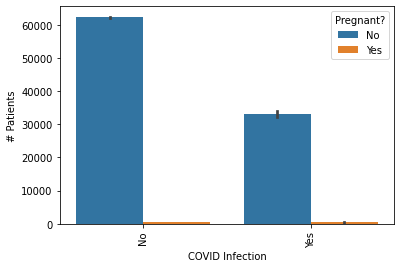

In [ ]:
sns.barplot(data=all_pts_clean, 
            x='COVID Infection', y='ID', hue='Pregnant?')
plt.xlabel("COVID Infection")
plt.ylabel("# Patients")
plt.xticks(rotation=90)

plt.show()

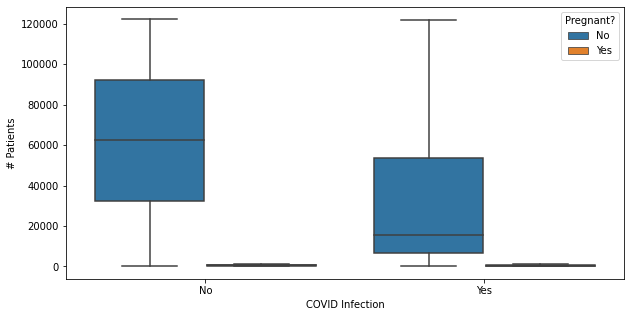

In [ ]:
plt.figure(figsize=(10,5))

sns.boxplot(data=all_pts_clean, 
            x='COVID Infection', y='ID', hue='Pregnant?')
plt.xlabel("COVID Infection")
plt.ylabel("# Patients")

plt.show()

## 2) Compare # Admitted if +COVID

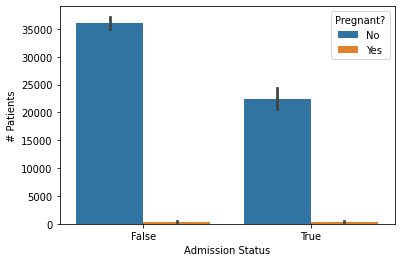

In [ ]:
sns.barplot(data=all_pts_clean[all_pts_clean['COVID Infection']=='Yes'], 
            x='Admitted?', y='ID', hue='Pregnant?')
plt.xlabel("Admission Status")
plt.ylabel("# Patients")

plt.show()

## 3) Compare # on Ventilator if +COVID

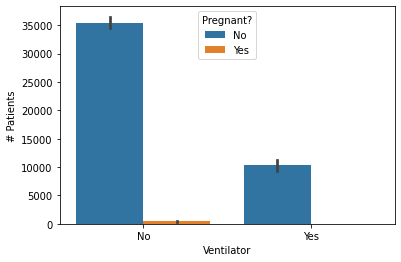

In [ ]:
sns.barplot(data=all_pts_clean[all_pts_clean['COVID Infection']=='Yes'], 
            x='Ventilator?', y='ID', hue='Pregnant?')
plt.xlabel("Ventilator")
plt.ylabel("# Patients")

plt.show()

## 4) Compare LOS if +COVID and Admitted

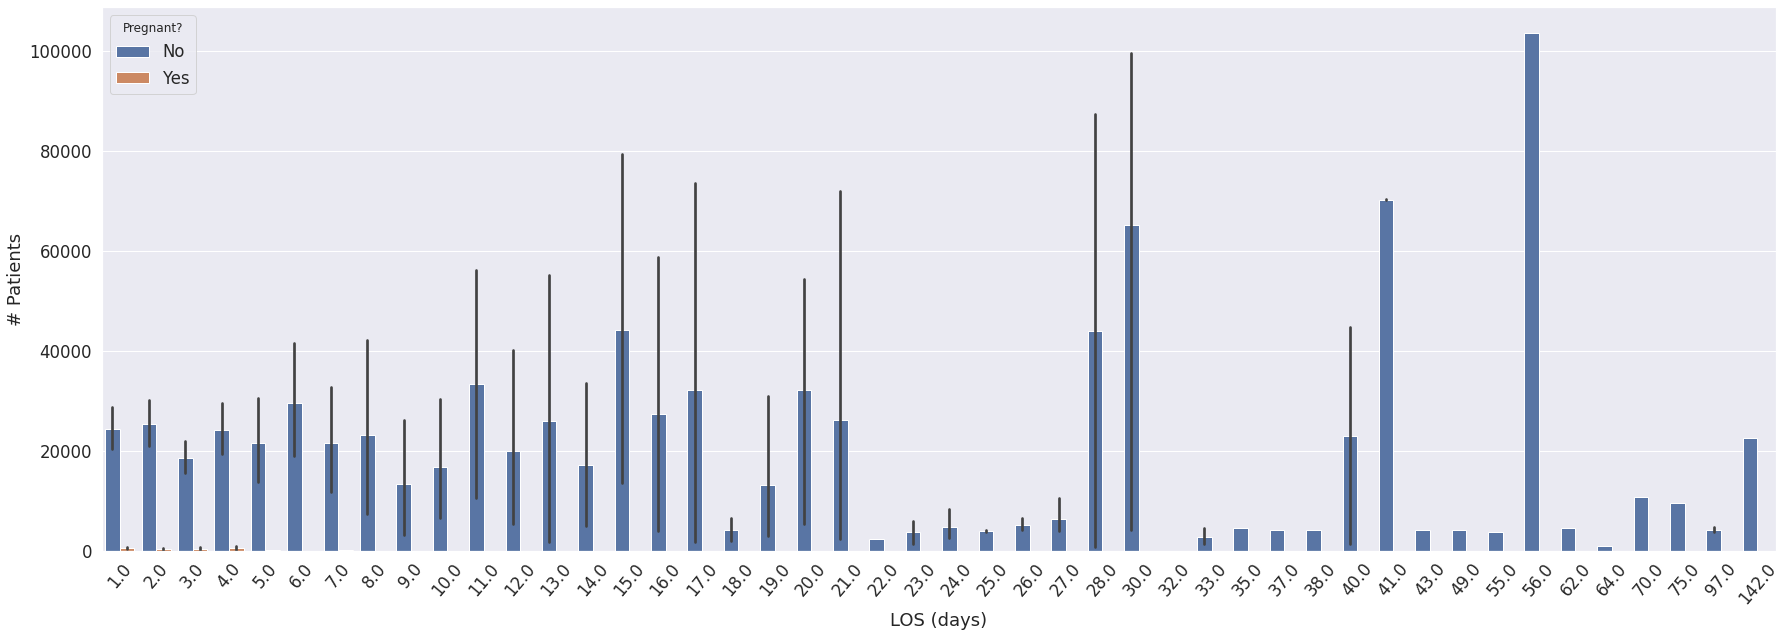

In [54]:
plt.figure(figsize=(30,10))
sns.set(font_scale=1.5) 

sns.barplot(data=all_pts_clean[(all_pts_clean['COVID Infection']=='Yes')& (all_pts_clean['Admitted?']==True)], 
            x='los', y='ID', hue='Pregnant?')
plt.xlabel("LOS (days)")
plt.ylabel("# Patients")
plt.xticks(rotation=50)

plt.show()

## Prepare Dataset for Tableau

In [55]:
from google.colab import drive

In [56]:
drive.mount('/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /drive


In [57]:
all_pts_clean.to_csv('/drive/My Drive/DA/COVID_HHC_dataset.csv')

#Conclusions

1) Descriptive statistics show that among the entire patient population that received a COVID test between March and July 2020 (n=123,263), the average age was 47 and the average length of stay (ALOS) was 6.4 days. The age of these patients ranged from 11 to 120, and the ALOS ranged from 1 to 142 days.

2) The vast majority of patients that got tested for COVID did not show a positive result that led to a confirmed COVID diagnosis. 

3) Regarding demographics, over half (57%) of +COVID patients were of non-Hispanic ethnicity.


4) Of +COVID patients (n=4,881), the age range was 11 to 99, with the average being 37 years old. The ALOS ranged from 1 to 142 days, which resulted in an average of 6 days. 6.2% of these patients were deceased. Only 1% were pregnant at the time of testing. 

5) Of the +COVID patients that were also pregnant (n=1,149), the average age was 31 years old and the ALOS was 2.4 days of those who were also admitted. None of these patients were put on a ventilator. Compared to the general population, the pregnant group had a lower average age as well as lower ALOS.

6) By comparing the n of both groups, the non-pregnant group is significantly higher in the number of infected (+COVID), admitted, and patients on ventilator, as well as a longer ALOS. However, it is likely premature to make a conclusion based on these numbers without comparing population-specific ratios.

# References

https://www.cdc.gov/coronavirus/2019-ncov/cases-updates/special-populations/pregnancy-data-on-covid-19.html

https://www.cdc.gov/coronavirus/2019-ncov/need-extra-precautions/pregnancy-breastfeeding.html

https://www.acog.org/patient-resources/faqs/pregnancy/coronavirus-pregnancy-and-breastfeeding

https://www.uptodate.com/contents/coronavirus-disease-2019-covid-19-pregnancy-issues